Harjoitustyön aiheena on ennustaa kuluttajan antama arvosana Airbnb kohteelle.

Importataan ja asennetaan kirjastoja, joita voidaan hyödyntää datan käsittelyssä.

In [7]:
!pip install sklearn
!pip install numpy

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=8190085c97bec69ec16bb41b6ccbaba8c2bc06eef58984dd77024f49d6a39729
  Stored in directory: c:\users\teemu\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.impute import SimpleImputer as Imputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from collections import Counter
from sklearn import ensemble
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV


from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv("Desktop/listings (3).csv.gz")
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18674,https://www.airbnb.com/rooms/18674,20211207182400,2021-12-08,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,https://www.airbnb.com/users/show/71615,...,4.90,4.71,4.29,HUTB-002062,t,19,19,0,0,0.21
1,23197,https://www.airbnb.com/rooms/23197,20211207182400,2021-12-08,Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony,"Beautiful spacious apartment, large terrace, 5...","Strategically located in the Parc del Fòrum, a...",https://a0.muscache.com/pictures/miso/Hosting-...,90417,https://www.airbnb.com/users/show/90417,...,4.98,4.66,4.67,HUTB-005057,f,2,2,0,0,0.41
2,32711,https://www.airbnb.com/rooms/32711,20211207182400,2021-12-08,Sagrada Familia area - Còrsega 1,A lovely two bedroom apartment only 250 m from...,What's nearby <br />This apartment is located...,https://a0.muscache.com/pictures/357b25e4-f414...,135703,https://www.airbnb.com/users/show/135703,...,4.79,4.81,4.40,HUTB-001722,t,3,3,0,0,0.50
3,34981,https://www.airbnb.com/rooms/34981,20211207182400,2021-12-07,VIDRE HOME PLAZA REAL on LAS RAMBLAS,Spacious apartment for large families or group...,"Located in Ciutat Vella in the Gothic Quarter,...",https://a0.muscache.com/pictures/c4d1723c-e479...,73163,https://www.airbnb.com/users/show/73163,...,4.68,4.73,4.47,HUTB-001506,f,2,2,0,0,1.17
4,35318,https://www.airbnb.com/rooms/35318,20211207182400,2021-12-07,Luxury room with private bathroom and balcony,"Luxury Room with King Size bed, private bathro...",The Gothic Quarter of Barcelona. One of the ol...,https://a0.muscache.com/pictures/miso/Hosting-...,152070,https://www.airbnb.com/users/show/152070,...,4.83,4.81,4.68,NaN,t,1,0,1,0,1.89


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15707 entries, 0 to 15706
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            15707 non-null  int64  
 1   listing_url                                   15707 non-null  object 
 2   scrape_id                                     15707 non-null  int64  
 3   last_scraped                                  15707 non-null  object 
 4   name                                          15697 non-null  object 
 5   description                                   15615 non-null  object 
 6   neighborhood_overview                         9188 non-null   object 
 7   picture_url                                   15707 non-null  object 
 8   host_id                                       15707 non-null  int64  
 9   host_url                                      15707 non-null 

In [4]:
cols_to_remove = ['id','listing_url','scrape_id','last_scraped','name','description','neighborhood_overview','picture_url','host_id','host_url','host_name','host_about','host_thumbnail_url',
                  'host_picture_url','host_listings_count','neighbourhood','neighbourhood_cleansed','bathrooms','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights',
                  'maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated','calendar_last_scraped','first_review','last_review','license','host_since',
                  'host_location','host_neighbourhood','host_total_listings_count','host_has_profile_pic','latitude','longitude','review_scores_accuracy','review_scores_cleanliness',
                  'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','calculated_host_listings_count','calculated_host_listings_count_entire_homes',
                 'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','reviews_per_month','availability_60','availability_90','host_verifications',
                  'number_of_reviews_ltm','number_of_reviews_l30d','has_availability','amenities']
data = df.drop(cols_to_remove, axis=1)

In [5]:
data=data.dropna()

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7745 entries, 0 to 15639
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_response_time            7745 non-null   object 
 1   host_response_rate            7745 non-null   object 
 2   host_acceptance_rate          7745 non-null   object 
 3   host_is_superhost             7745 non-null   object 
 4   host_identity_verified        7745 non-null   object 
 5   neighbourhood_group_cleansed  7745 non-null   object 
 6   property_type                 7745 non-null   object 
 7   room_type                     7745 non-null   object 
 8   accommodates                  7745 non-null   int64  
 9   bathrooms_text                7745 non-null   object 
 10  bedrooms                      7745 non-null   float64
 11  beds                          7745 non-null   float64
 12  price                         7745 non-null   object 
 13  mi

<AxesSubplot:>

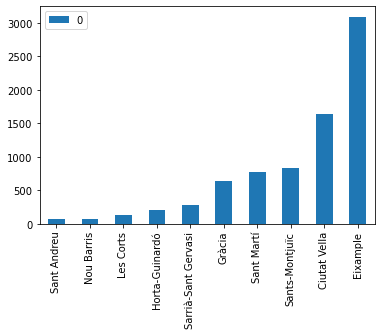

In [6]:
nb_counts = Counter(data.neighbourhood_group_cleansed)
tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)
tdf.plot(kind='bar')

In [7]:
y = []
for i in data['instant_bookable']:
    if i == 't':
        y.append(1)
    else:
        y.append(0)
data = data.drop('instant_bookable', axis=1)
data['instant_bookable_new'] = y

x = []
for n in data['host_identity_verified']:
    if n == 't':
        x.append(1)
    else:
        x.append(0)
data = data.drop('host_identity_verified', axis=1)
data['host_identity_verified_new'] = x

z = []
for m in data['host_is_superhost']:
    if m == 't':
        z.append(1)
    else:
        z.append(0)
data = data.drop('host_is_superhost', axis=1)
data['host_is_superhost_new'] = z

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7745 entries, 0 to 15639
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_response_time            7745 non-null   object 
 1   host_response_rate            7745 non-null   object 
 2   host_acceptance_rate          7745 non-null   object 
 3   neighbourhood_group_cleansed  7745 non-null   object 
 4   property_type                 7745 non-null   object 
 5   room_type                     7745 non-null   object 
 6   accommodates                  7745 non-null   int64  
 7   bathrooms_text                7745 non-null   object 
 8   bedrooms                      7745 non-null   float64
 9   beds                          7745 non-null   float64
 10  price                         7745 non-null   object 
 11  minimum_nights                7745 non-null   int64  
 12  maximum_nights                7745 non-null   int64  
 13  av

In [9]:
categorical = ['host_response_time','neighbourhood_group_cleansed','property_type','room_type']
remove_columns = ['host_response_time','neighbourhood_group_cleansed','property_type','room_type']
category_data = pd.get_dummies(data[categorical])
data = data.drop(remove_columns, axis=1)

In [10]:
result = pd.concat([data, category_data], axis=1, join='inner')
result.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7745 entries, 0 to 15639
Data columns (total 78 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   host_response_rate                                 7745 non-null   object 
 1   host_acceptance_rate                               7745 non-null   object 
 2   accommodates                                       7745 non-null   int64  
 3   bathrooms_text                                     7745 non-null   object 
 4   bedrooms                                           7745 non-null   float64
 5   beds                                               7745 non-null   float64
 6   price                                              7745 non-null   object 
 7   minimum_nights                                     7745 non-null   int64  
 8   maximum_nights                                     7745 non-null   int64  
 9   availab

In [11]:
result.head(20)

,host_response_rate,host_acceptance_rate,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,...,property_type_Shared room in guesthouse,property_type_Shared room in hostel,property_type_Shared room in hotel,property_type_Shared room in loft,property_type_Shared room in rental unit,property_type_Tiny house,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,97%,88%,8,2 baths,3.0,6.0,$102.00,1,1125,15,...,0,0,0,0,0,0,1,0,0,0
1,100%,83%,6,2 baths,3.0,4.0,$220.00,3,300,21,...,0,0,0,0,0,0,1,0,0,0
3,100%,87%,9,3 baths,4.0,6.0,$214.00,4,365,8,...,0,0,0,0,0,0,1,0,0,0
4,100%,100%,2,1 private bath,1.0,1.0,$93.00,3,30,14,...,0,0,0,0,0,0,0,0,1,0
5,100%,76%,1,1 shared bath,1.0,1.0,$36.00,2,65,6,...,0,0,0,0,0,0,0,0,1,0
6,99%,100%,4,1 bath,1.0,1.0,$50.00,2,364,4,...,0,0,0,0,0,0,1,0,0,0
7,88%,51%,6,2 baths,2.0,4.0,$110.00,3,365,18,...,0,0,0,0,0,0,1,0,0,0
8,100%,83%,2,1 bath,2.0,3.0,$28.00,128,340,0,...,0,0,0,0,0,0,1,0,0,0
10,100%,98%,6,1 bath,2.0,4.0,$105.00,2,90,7,...,0,0,0,0,0,0,1,0,0,0
11,100%,82%,2,2 baths,1.0,2.0,$49.00,31,730,20,...,0,0,0,0,0,0,0,0,1,0


In [12]:
result['host_response_rate'] =  result['host_response_rate'].str.replace('%', '')
result['host_response_rate'] =  pd.to_numeric(result['host_response_rate'])

result['host_acceptance_rate'] =  result['host_acceptance_rate'].str.replace('%', '')
result['host_acceptance_rate'] =  pd.to_numeric(result['host_acceptance_rate'])

result['bathrooms_text'] =  result['bathrooms_text'].str.replace('baths', '')
result['bathrooms_text'] =  result['bathrooms_text'].str.replace('shared', '')
result['bathrooms_text'] =  result['bathrooms_text'].str.replace('private', '')
result['bathrooms_text'] =  result['bathrooms_text'].str.replace('bath', '')
result['bathrooms_text'] =  result['bathrooms_text'].str.replace('Shared half-', '')
result['bathrooms_text'] =  result['bathrooms_text'].str.replace('Half-', '')
result['bathrooms_text'] =  result['bathrooms_text'].str.replace('Private half-', '')
result['bathrooms_text'] =  pd.to_numeric(result['bathrooms_text'])

result['price'] =  result['price'].str.replace('$', '')
result['price'] =  result['price'].str.replace(',', '')
result['price'] =  pd.to_numeric(result['price'])


In [13]:
np.any(np.isnan(result))

True

In [14]:
result=result.dropna()

In [15]:
np.any(np.isnan(result))

False

In [ ]:
result.describe()

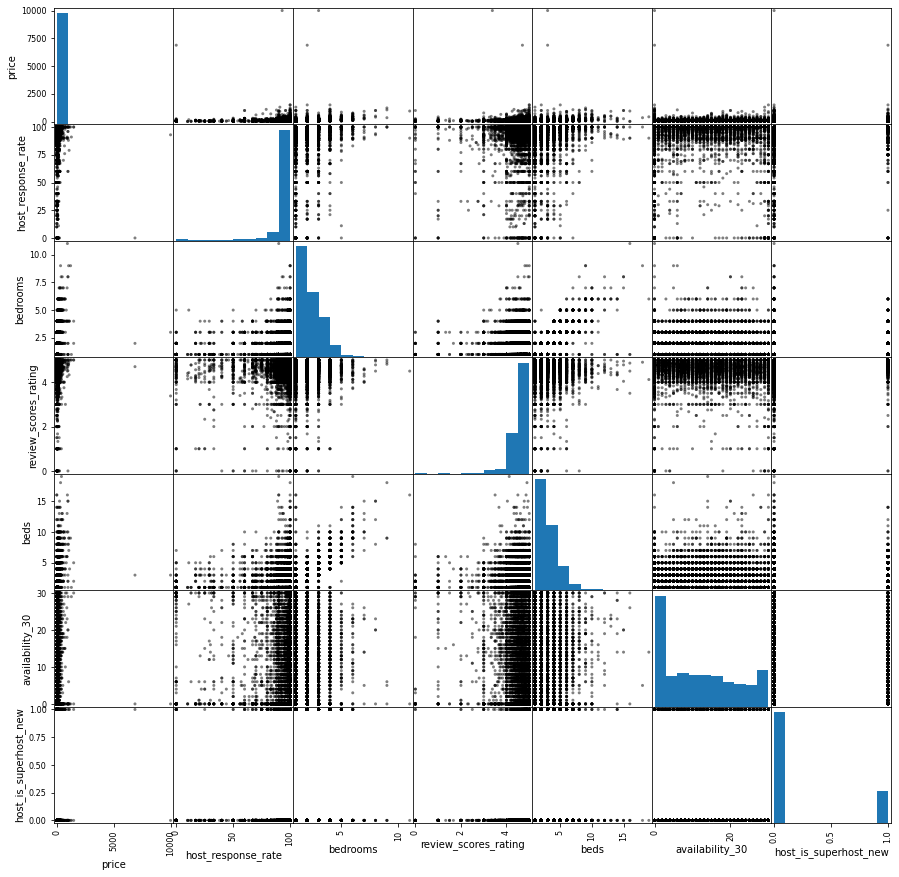

In [16]:
scattercolumns = ['price','host_response_rate', 'bedrooms', 'review_scores_rating', 'beds', 'availability_30', 'host_is_superhost_new']
axis = pd.plotting.scatter_matrix(result[scattercolumns],
                        figsize=(15, 15), c='black')

Text(0, 0.5, 'Median Absolute Error')

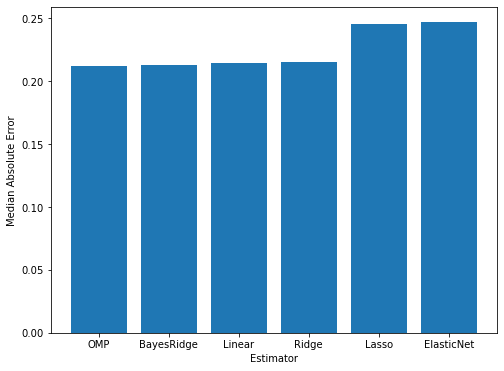

In [17]:
number = 1
linear_list = [ linear_model.LinearRegression(), linear_model.Ridge(),
        linear_model.Lasso(), linear_model.ElasticNet(),
        linear_model.BayesianRidge(), linear_model.OrthogonalMatchingPursuit() ]

labels = np.array(['Linear', 'Ridge', 'Lasso', 'ElasticNet', 'BayesRidge', 'OMP'])
vals = np.array([])

X_train, X_test, y_train, y_test = train_test_split(result.drop(['review_scores_rating'], axis=1), result.review_scores_rating, test_size=0.2, random_state=20)

for e in linear_list:
    e.fit(X_train, y_train)
    this_err = metrics.median_absolute_error(y_test, e.predict(X_test))
    vals = np.append(vals, this_err)

posit = np.arange(vals.shape[0])
srt = np.argsort(vals)
plt.figure(figsize=(8,6))
plt.bar(posit, vals[srt], align='center')
plt.xticks(posit, labels[srt])
plt.xlabel('Estimator')
plt.ylabel('Median Absolute Error')

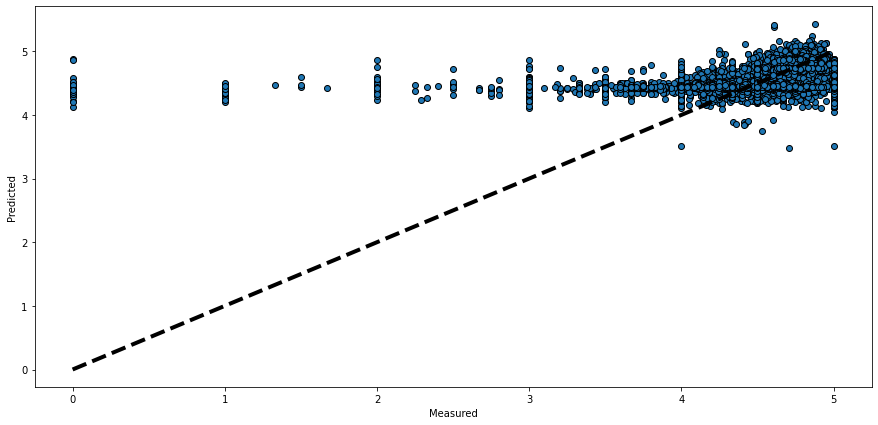

In [24]:

omp = linear_model.OrthogonalMatchingPursuit()

y = result.review_scores_rating
X = result.drop(columns='review_scores_rating')

predict = cross_val_predict(omp, X, y, cv=10)

figure, axis = plt.subplots(figsize=(15, 7))
axis.scatter(y, predict, edgecolors=(0, 0, 0))
axis.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
axis.set_xlabel('Measured')
axis.set_ylabel('Predicted')
plt.show()

In [25]:
pd.set_option('display.max_rows', 500)
new = result.corr()['review_scores_rating']
print(new)

host_response_rate                                   0.118559
host_acceptance_rate                                 0.003807
accommodates                                        -0.041619
bathrooms_text                                       0.015426
bedrooms                                            -0.013695
beds                                                -0.036961
price                                                0.007489
minimum_nights                                      -0.033530
maximum_nights                                      -0.014067
availability_30                                     -0.058608
availability_365                                    -0.046724
number_of_reviews                                    0.151708
review_scores_rating                                 1.000000
instant_bookable_new                                -0.062281
host_identity_verified_new                           0.013850
host_is_superhost_new                                0.249219
host_res